# Introduction


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
img = cv2.imread("messi.png")
img3 = cv2.imread("logo.png")

In [3]:
def wind(image):
    cv2.namedWindow('Display',cv2.WINDOW_NORMAL)
    cv2.imshow('Display',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
   
    


In [4]:
img1 = deepcopy(img)
circle = cv2.circle(img1,(533,459),40,(15,50,240),5)
wind(circle)

In [5]:
img1 = deepcopy(img)
def click2cirlce(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img1,(x,y),50,(0,255,0),20)
        
cv2.namedWindow('differences',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('differences',click2cirlce)

while True:
    cv2.imshow("differences",img1)
    a = cv2.waitKey(0)
    if a == 27:
        break
cv2.destroyAllWindows()

In [6]:
ball = img[425:495, 490:570]
img[0:70, 0:80] = ball
# cv2.imwrite('ball.png',img)

In [7]:
wind(img)

In [8]:
b,g,r = cv2.split(img)

In [9]:
img[:,:,2]

array([[100, 100, 100, ..., 255, 255, 255],
       [ 98,  98,  98, ..., 255, 255, 255],
       [ 96,  96,  97, ..., 255, 255, 255],
       ...,
       [255, 255, 238, ..., 255, 255, 255],
       [255, 255, 238, ..., 255, 255, 255],
       [255, 255, 252, ..., 255, 255, 255]], dtype=uint8)

## Basic Arithmetics

In [10]:
result = cv2.addWeighted(img,0.8,img,0.2,0)
wind(img3)

In [11]:
e1 = cv2.getTickCount()
rows,cols,channels = img3.shape
roi = img[0:rows,0:cols]

img32gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(img32gray,10,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img3_fg = cv2.bitwise_and(img3,img3,mask=mask)
dst = cv2.add(img_bg,img3_fg)
img[0:rows,0:cols] = dst
wind(img)
e2 = cv2.getTickCount()
print((e2 - e1)/cv2.getTickFrequency())

7.383921241


## cv2.useOptimized()

In [12]:
%timeit res = cv2.medianBlur(img,49)

103 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
cv2.setUseOptimized(True)

In [14]:
%timeit res = cv2.medianBlur(img,49)

103 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]


## Video Analysis

In [16]:
import cv2
import numpy as np


## filtering a certain color

In [65]:
cap = cv2.VideoCapture('waka.mp4')
while(1):
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of green color in HSV
    lower_blue = np.array([50,100,100])
    upper_blue = np.array([70,255,255])
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.namedWindow('frame',cv2.WINDOW_NORMAL)
    cv2.imshow('frame',frame)
    cv2.namedWindow('mask',cv2.WINDOW_NORMAL)
    cv2.imshow('mask',mask)
    cv2.namedWindow('res',cv2.WINDOW_NORMAL)
    cv2.imshow('res',res)
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
#     out = cv2.VideoWriter('output.mp4',fourcc, 20.0, (640,480))
#     out.write(res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

# Finding The upper and lower color values

In [18]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


## Thresholding

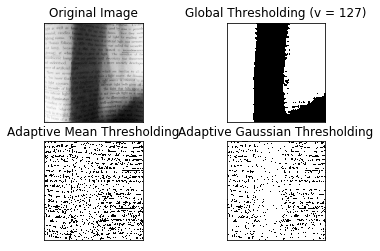

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('page.jpg',0)

img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Resizing

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

In [21]:
logo = cv2.imread("logo.png")

In [22]:
biglogo = cv2.resize(logo,dsize=None,fx=0.8,fy=0.8,interpolation=cv2.INTER_CUBIC)

In [23]:
cv2.imshow('resized',biglogo)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Geometric Operations

In [24]:
cropo = cv2.imread("ball.jpg",0)
crop = cv2.resize(cropo,dsize=None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
wind(crop)

In [25]:
sobelx = cv2.Sobel(crop,cv2.CV_8U,1,1,ksize=3)
wind(sobelx)

In [26]:
lap = cv2.Laplacian(crop,cv2.CV_8U)
wind(lap)

# Edge and feature detection

In [27]:
pitch = cv2.imread("ball.jpg",0)
pitch1 = cv2.imread("ball.jpg",0)
edges = cv2.Canny(pitch,100,200)
wind(edges)

In [28]:
lines = cv2.HoughLines(edges,1,np.pi/180,300)

In [29]:
lines

array([[[ 724.       ,    1.5707964]],

       [[  28.       ,    1.5707964]],

       [[  34.       ,    1.5707964]],

       [[ 718.       ,    1.5707964]],

       [[1220.       ,    0.       ]],

       [[  79.       ,    0.       ]],

       [[  85.       ,    0.       ]],

       [[1214.       ,    0.       ]],

       [[ 289.       ,    1.5707964]],

       [[ 283.       ,    1.5707964]],

       [[ 469.       ,    1.5707964]],

       [[ 464.       ,    1.5707964]],

       [[ 652.       ,    0.       ]],

       [[ 647.       ,    0.       ]]], dtype=float32)

In [30]:
for iterator in lines:
    rho = iterator[0][0]
    theta = iterator[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(x0+1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(x0-1000*(a))
    cv2.line(pitch,(x1,y1),(x2,y2),(0,255,0),2)

In [31]:
pc = np.hstack((pitch1,pitch))
wind(pc)

In [32]:
lena = cv2.imread("lena.png",0)
wind(lena)

In [33]:
hist = cv2.calcHist([lena],[0],None,[256],[0,256])

In [34]:
xaxis = np.arange(256).reshape(256,1)

In [35]:
histogram = np.hstack((xaxis,hist)).astype(int)

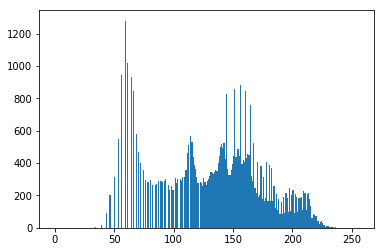

In [36]:
plt.hist(lena.flatten(),256,[0,256])
plt.show()

In [37]:
lena.flatten()

array([168, 168, 167, ..., 106, 116, 118], dtype=uint8)

In [38]:
equ = cv2.equalizeHist(lena)

In [39]:
wind(equ)

In [40]:
sta = np.hstack((lena,equ))

In [41]:
wind(sta)

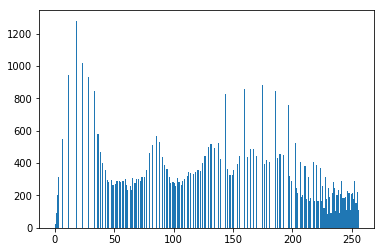

In [42]:
plt.hist(equ.flatten(),256,[0,256])
plt.show()

In [43]:
blr = cv2.blur(lena,(3,3))
wind(blr)

In [44]:
stablr = np.hstack((lena,blr))

In [45]:
wind(stablr)

In [46]:
blrG = cv2.GaussianBlur(lena,(3,3),0)

In [47]:
stablrG = np.hstack((lena,blrG))

In [48]:
wind(stablrG)

In [49]:
dbls = np.hstack((stablr,stablrG))

In [50]:
wind(dbls)

# Image Classification using K-means

In [51]:
pat = 'lena.png'
if pat.endswith('.jpg'):
    print('jpg')
elif pat.endswith('.png'):
    game = cv2.imread(pat,1)
else:
    print('Wrong code')

In [52]:
wind(game)

In [53]:
img = np.float32(game.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
k = 5
ret,lab,center = cv2.kmeans(img,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[lab.flatten()]
res2 = res.reshape((game.shape))


In [54]:
comp = np.hstack((game,res2))
wind(comp)

In [55]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

In [56]:
Path = 'landsat5/'

In [57]:
Lndsat5bands = []
Lndsat5bands32 = []

for i in range(1,8):
    Lndsat5bands.append(cv2.imread(Path+'B'+str(i)+'.TIF',0)[2515:3840,1110:2410])
    
for i in range(7):
    Lndsat5bands32.append(np.float32(cv2.equalizeHist(Lndsat5bands[i])))
    

In [58]:
stacked = cv2.merge((Lndsat5bands32[6],Lndsat5bands32[5],Lndsat5bands32[4],Lndsat5bands32[3],Lndsat5bands32[2],Lndsat5bands32[1],Lndsat5bands32[0]))

In [59]:
reshapedimgs = stacked.reshape((-1,7))

criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1.0)
k = 6
ret,lab,center = cv2.kmeans(reshapedimgs,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[lab.flatten()]
res2 = res.reshape((stacked.shape))

In [60]:
img3bands = deepcopy(res2[:][:,:,:3])
# classifield_image = cv2.imwrite('Classifield.TIF',img3bands)

In [61]:
wind(img3bands)

In [62]:
original = deepcopy(stacked[:][:,:,:3])
wind(original)

In [63]:
p = 0
for i in range(len(img3bands)):
    for j in range(len(img3bands[i])):
        if np.sum(img3bands[i][j])==141:
            p+=1
        else:
            pass
with open('summary.txt','w') as f:
    f.write(str(p*900))
print('Total forest area : ',p*900,' Square metres')

Total forest area :  151290900  Square metres
